In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [5]:
EGS13Cha = candels[-11]

delz = EGS13Cha[0]
nearby = EGS13Cha[1][1]
host = EGS13Cha[1][2]
lc = EGS13Cha[1][3]

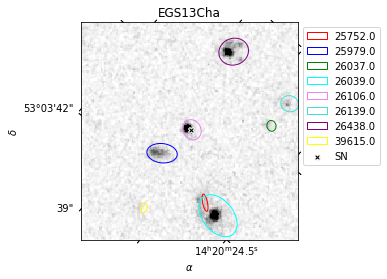

In [7]:
nick = EGS13Cha[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(EGS13Cha[1][0]['RA'],EGS13Cha[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.006,val_max = .0525 )

In [10]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

1 ID,12 zbest,9 zspec,8 zphot,15 zphot_l95,16 zphot_u95
float64,float64,float64,float64,float64,float64
25752.0,2.33,-99.0,2.33,0.29,3.92
25979.0,0.514,-99.0,0.514,0.12,0.65
26037.0,1.375,-99.0,1.375,0.41,5.72
26039.0,2.575,-99.0,2.575,2.28,2.86
26106.0,0.796,-99.0,0.796,0.98,2.29
26139.0,1.607,-99.0,1.607,1.26,1.76
26438.0,2.114,-99.0,2.114,1.83,2.65
39615.0,1.835,-99.0,1.835,0.31,3.31


## Published as specz ~ 1.4, could possibly be a Ia but more likely a  CC

## The host seems clear, I think my catalog has typo has zphot ~ 0.796 = [0.98,2.29]; obvs doesn't make sense, my guess is it mean 1.796

## That zphot agrees with the evernotes, but again they have keck/mosfire spec indicating z~ 1.4

## Don't think we need to reeval